ABSTRACT

We are looking to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

Our goal is predict if the customer will subscribe (yes/no) to a term deposit (variable y)

In this context, data consist of binary dependent variable (y) and 13 independent variables were subjected to the data pre-processing step. Then, using the related methods, a model was created with 33 independent variables.

According to feature selection method, the most critical feature is duration. Therefore the company should focus duration time.
Considering the duration, the 'y' rate of customers called from a cellular is higher.

Customer who are secondary education, marital status married, and job class management profiles tend to buy more investment products.


#Result:
When the KNeighborsClassifier method was evaluated with the cross validation metric, the accuracy value was found to be  0.927

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio.plotly import plot, iplot
import plotly
import plotly.graph_objs as go

In [ ]:
data = pd.read_csv('./term-deposit-marketing-2020.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [ ]:
#Add week column to dataframe
def week(data):

    if (data['day'] >= 1 and data['day'] < 8):
        return '1_7'
    elif (data['day'] >= 8 and data['day'] < 15):
        return '8_14'
    elif (data['day'] >= 15 and data['day'] < 22):
        return '15_21'
    elif (data['day'] >= 22):
        return '22_31'

In [ ]:
data['week'] = data.apply(week, axis = 1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,week
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,1_7
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,1_7
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,1_7
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,1_7
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,1_7


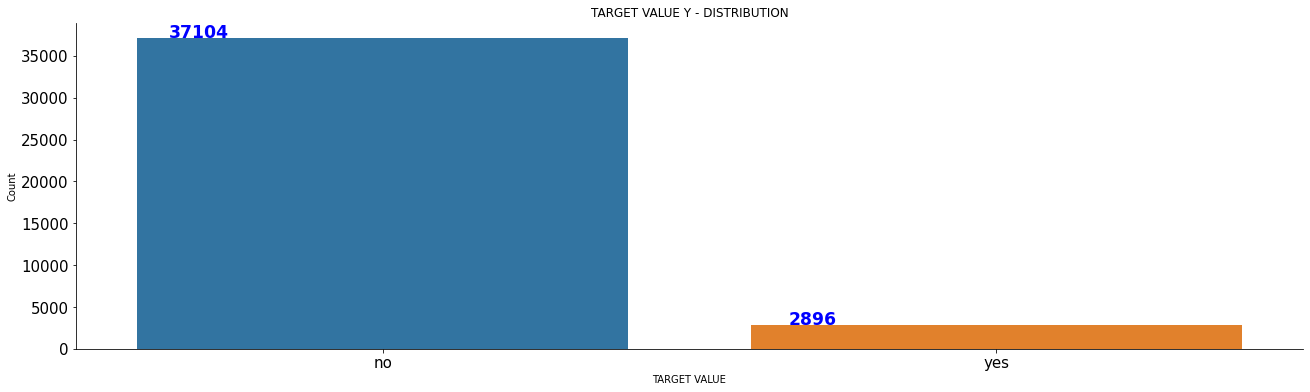

In [ ]:
#Target Value Distribution
fig,ax=plt.subplots()
fig.set_size_inches(22,6)
sns.countplot(x="y",data=data,order=data["y"].unique())
ax.set(ylabel="Count",xlabel="TARGET VALUE",title='TARGET VALUE Y - DISTRIBUTION')
title='TARGET VALUE Y - Distribution'
ax.tick_params(labelsize=15)
sns.despine()
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),
                weight="bold", horizontalalignment='center', size='xx-large', color='blue')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
 14  week       40000 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.6+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


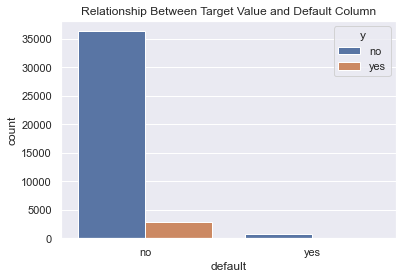

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='default', hue="y" ,data=data).set_title('Relationship Between Target Value and Default Column')
plt.show()

In [ ]:
# transforming some feature's values to 0 and 1
data["housing"]=data["housing"].replace("yes", 1)
data["housing"]=data["housing"].replace("no", 0)

data["loan"]=data["loan"].replace("yes", 1)
data["loan"]=data["loan"].replace("no", 0) 

data["default"]=data["default"].replace("yes", 1)
data["default"]=data["default"].replace("no", 0)  

data["y"]=data["y"].replace("yes", 1)
data["y"]=data["y"].replace("no", 0) 

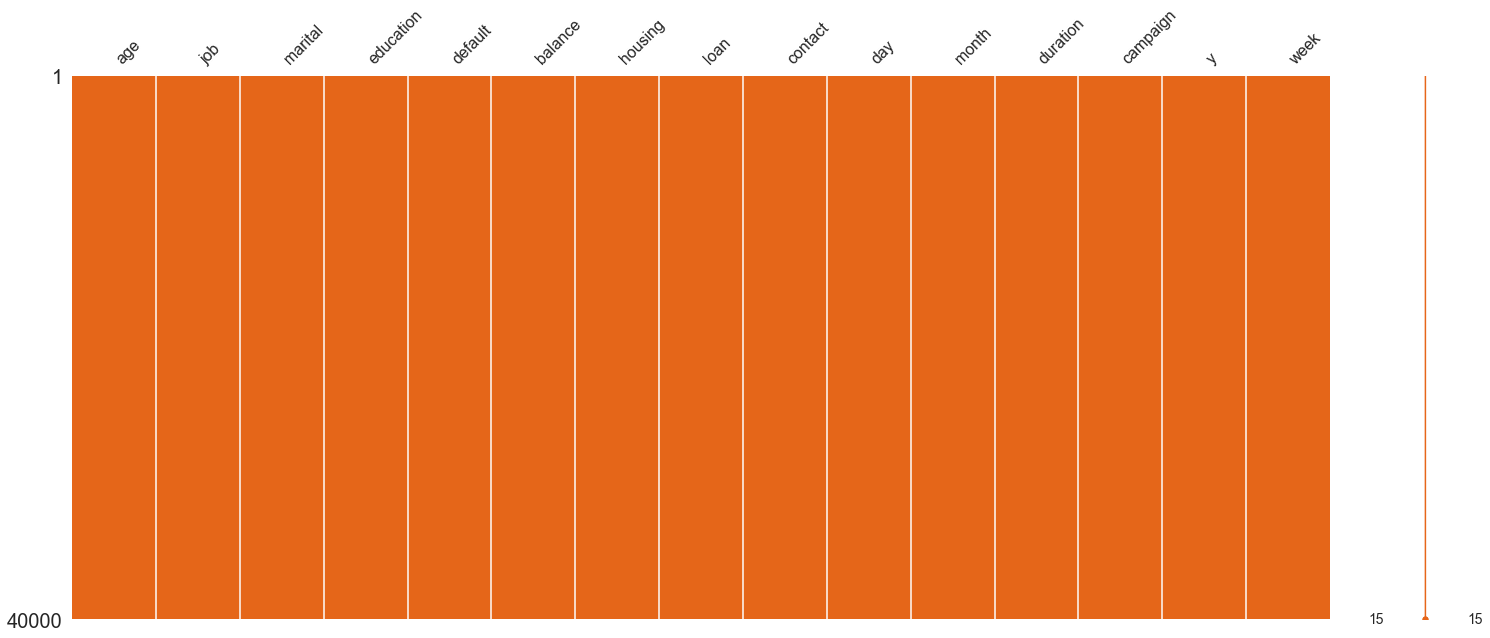

In [ ]:
#Missing Variables
import missingno as msno
msno.matrix(data,sparkline=True,color=(0.9,0.4,0.1));

In [ ]:
%matplotlib inline
import matplotlib.ticker as ticker

# Histogram of the target categories
def distributionPlot(data,column):
    ncount = len(data)
    ax = sns.countplot(x = column, data=data ,hue='y', palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    plt.savefig('target_histogram.png')
    del ncount, x, y

VISUALIZATION CATEGORICAL FEATURES

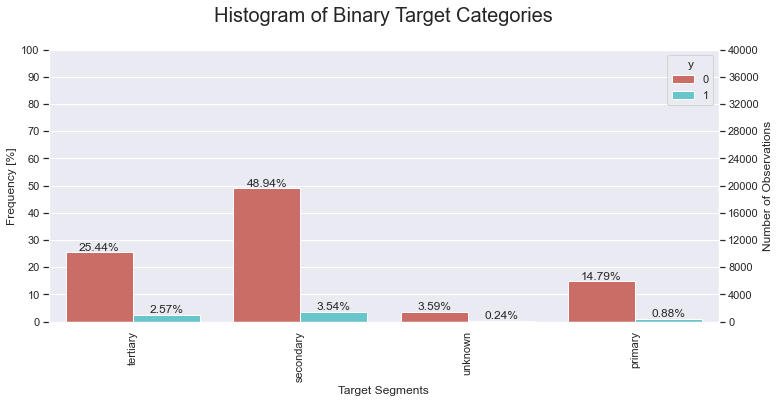

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"education");

In [ ]:
# According to education class we should prioritize customers looking by to their secondary, tertiary, primary, unkonwn.

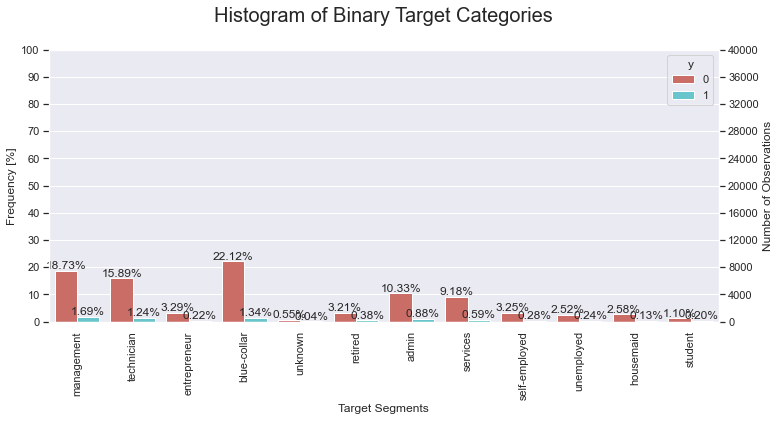

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"job")

In [ ]:
## According to job class we should prioritize customers looking by to their management, techinian, blue-collar.

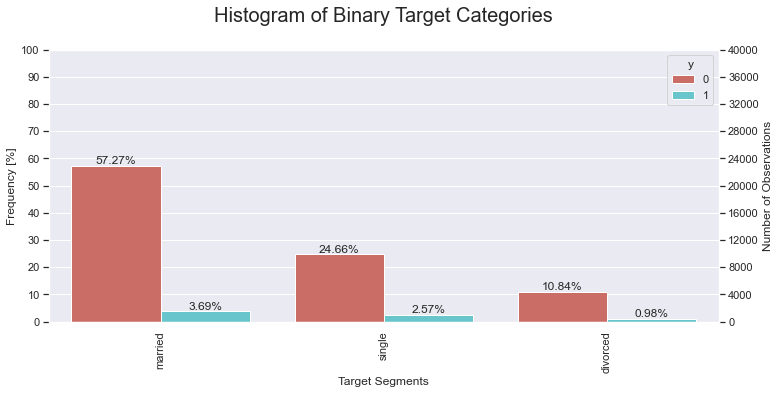

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"marital")

In [ ]:
## According to marital class we should prioritize customers looking by to their married.

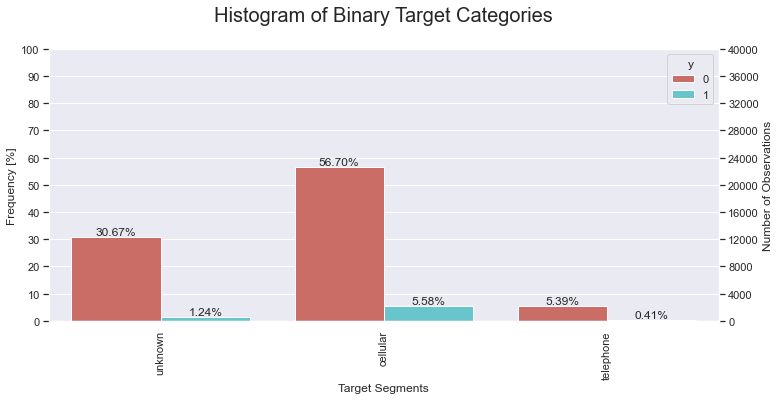

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"contact")

In [ ]:
## According to contact class we should prioritize customers looking by to their celluar.
#The rate of y is high in most of the contacts with the customers via cellular.

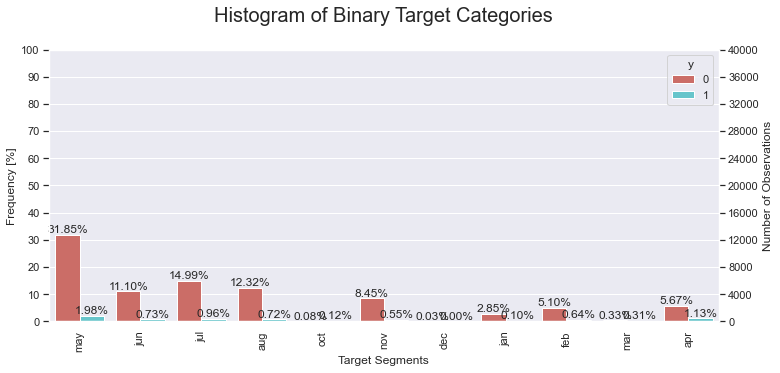

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"month")

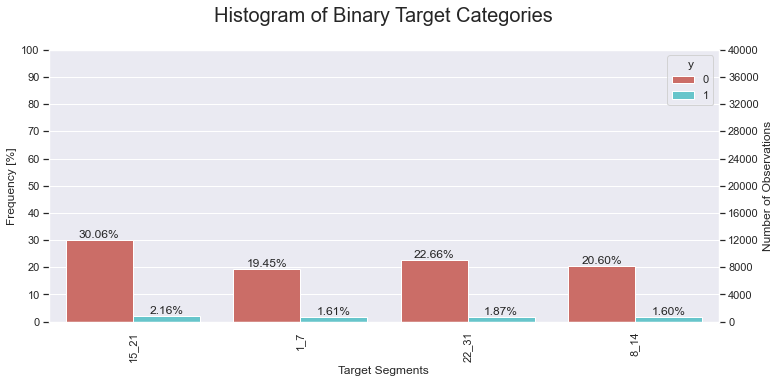

<Figure size 432x288 with 0 Axes>

In [ ]:
distributionPlot(data,"week")

In [ ]:
#if divorced, I'll convert it to single data.
data['marital'] = ['Married' if x =='married' else 'Single' for x in data['marital']] 

data.replace('unknown', np.nan, inplace=True)

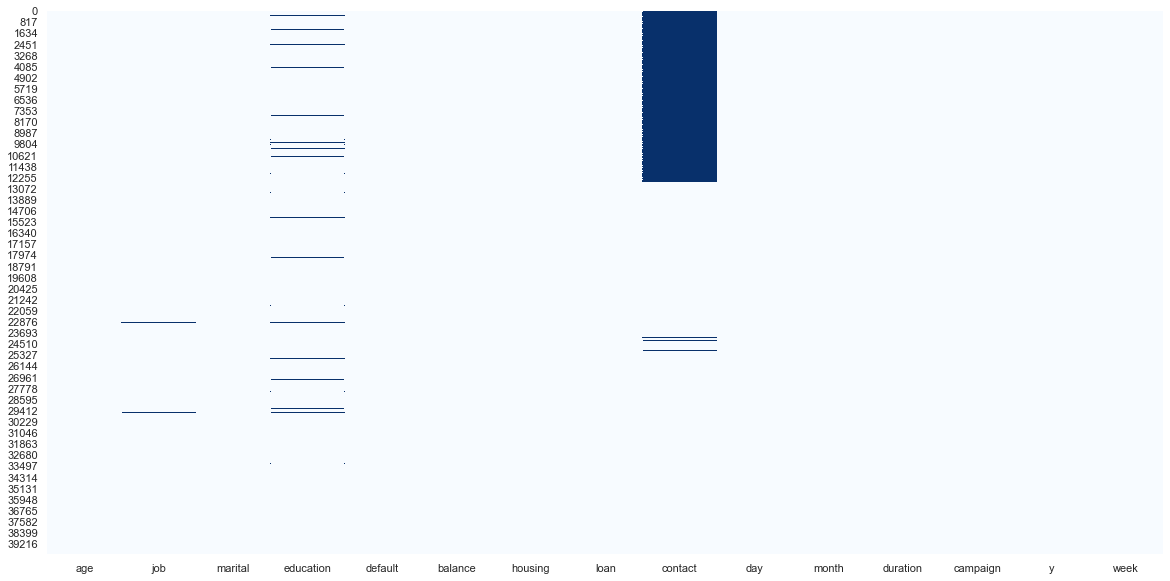

In [ ]:
#To See Relationship between NaN values

f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(data.isnull(), cbar=False, ax=ax, cmap="Blues");

In [ ]:
def dataframeInformations(data):
    totalEntryList=[]
    totalMissingValueList=[]
    missingValRateList=[]
    dataTypeList=[]
    uniqueValuesList=[]
    totalUniqueValList=[]
    variableNameList=[]
  
    for element in data.columns:
        missingValRate=round((data[element].isna().sum()/len(data[element]))*100,2) #to show correct decimal and float part of number.
        totalEntryList.append(len(data[element]))
        totalMissingValueList.append(data[element].isna().sum())
        missingValRateList.append(missingValRate)
        dataTypeList.append(data[element].dtype)
        uniqueValuesList.append(list(data[element].unique()))
        totalUniqueValList.append(len(data[element].unique()))
        variableNameList.append(element)
        
    #create a dataframe to show all informations together
    dataInfoDf=pd.DataFrame({'Variable':variableNameList,'#_Total_Entry':totalEntryList,\
                           '#_Missing_Value':totalMissingValueList,'%_Missing_Value':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           '#_Uniques_Values':totalUniqueValList})
    return dataInfoDf.sort_values(by="Variable")

In [ ]:
dataInfo=dataframeInformations(data)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')

In [ ]:
def display_all(dataInfo):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(dataInfo)

In [ ]:
#this function find imputation technique using by missing rate
def findMethod(data,variableList):
    data['Imputation_Technique']=""
    for element in variableList:
        missingRate=float(dataInfo['%_Missing_Value'][element])
        if missingRate == 0:
             data['Imputation_Technique'][element]='No Missing Value'
        elif missingRate <= 5:
            data['Imputation_Technique'][element]='Simple'
        elif missingRate < 25:
            data['Imputation_Technique'][element]='Tree-based'
        elif missingRate < 50 :
            data['Imputation_Technique'][element]='Model'
        elif missingRate >=50 :
            data['Imputation_Technique'][element]='Drop'

In [ ]:
findMethod(dataInfo,variableList)
display_all(dataInfo)

<ipython-input-27-9107a5a5e656>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Imputation_Technique'][element]='No Missing Value'
<ipython-input-27-9107a5a5e656>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Imputation_Technique'][element]='Model'
<ipython-input-27-9107a5a5e656>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Imputation_Technique'][element]='Simple'


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Uniques_Values,Imputation_Technique
Variable,,,,,,,
age,40000,0,0.00,int64,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...",70,No Missing Value
balance,40000,0,0.00,int64,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...",6849,No Missing Value
campaign,40000,0,0.00,int64,"[1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19...",48,No Missing Value
contact,40000,12765,31.91,object,"[nan, cellular, telephone]",3,Model
day,40000,0,0.00,int64,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21...",31,No Missing Value
default,40000,0,0.00,int64,"[0, 1]",2,No Missing Value
duration,40000,0,0.00,int64,"[261, 151, 76, 92, 198, 139, 217, 380, 50, 55,...",1535,No Missing Value
education,40000,1531,3.83,object,"[tertiary, secondary, nan, primary]",4,Simple
housing,40000,0,0.00,int64,"[1, 0]",2,No Missing Value


Handling Missing Values with Simple Method According to Target Value

In [ ]:
df1=data[data['y'] == 1]
df1['job'].mode()

0    management
dtype: object

In [ ]:
df2=data[data['y'] == 0]
df2['job'].mode()

0    blue-collar
dtype: object

In [ ]:
data.loc[data['y'] == 1,'job'].fillna('management', inplace=True)
data.loc[data['y'] == 0,'job'].fillna('blue-collar', inplace=True)

In [ ]:
df3=data[data['y'] == 1]
df3['education'].mode()

0    secondary
dtype: object

In [ ]:
df4=data[data['y'] == 0]
df4['education'].mode()

0    secondary
dtype: object

In [ ]:
data['education'].fillna(value='secondary', inplace=True)

In [ ]:
data.replace(np.nan,'unknown', inplace=True)

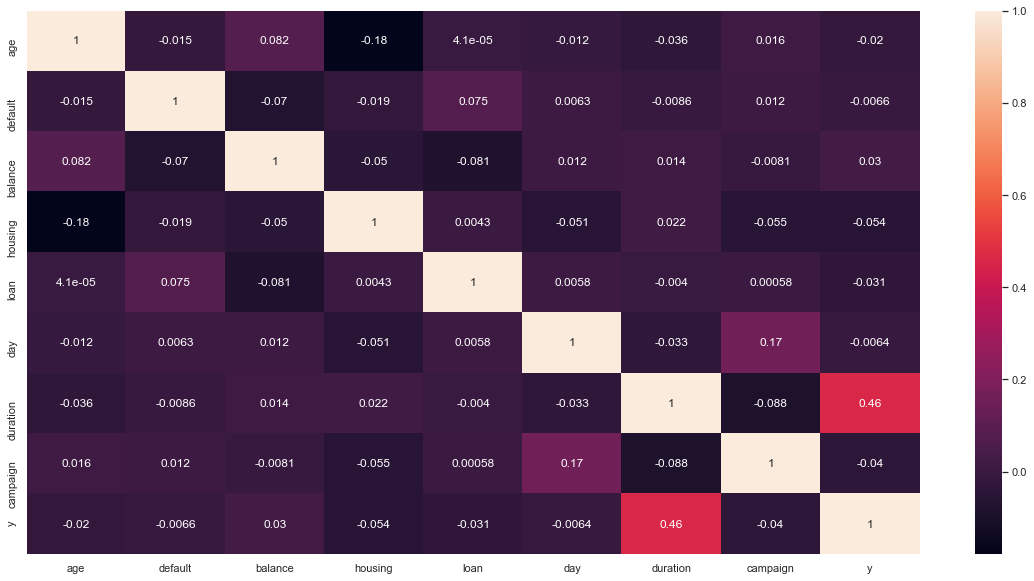

In [ ]:
#Correlation Matrix
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
#High Correlation between features
corr_matrix = data.corr().abs()
high_corr_var=np.where(corr_matrix>0.50)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [ ]:
high_corr_var

[]

In [ ]:
data_copy=data.copy()

In [ ]:
#Visualization Outlier Ratio

#this function will return for numerical values number of outlier if it's exist
def findOutlierForNumerical(data_copy,column,coefficient=1.5):
    numberOfValue=len(data_copy[column])
    sorted(data_copy[column])
    Q1,Q3=np.percentile(data_copy[column], [25,75])
    IQR = Q3 - Q1
    lowerbound = Q1 - (coefficient * IQR)
    upperbound = Q3 + (coefficient * IQR)
    lowerbound, upperbound
    dfOutlier=data[(data_copy[column] < lowerbound) | (data_copy[column] > upperbound)]
    numberOfOutlier=len(dfOutlier[column])
    print(column,'s outlier number is: ',numberOfOutlier)   
    # which values are outlier
    fig1,ax1=plt.subplots()
    ax1.pie([numberOfValue,numberOfOutlier],labels=["Normal Values","Outlier Values"],
            autopct='%1.1f%%',shadow=True, startangle=90,colors=["#900C3F","#00FFFF"],explode = (0.1,0.1))
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()
    return data_copy

age s outlier number is:  79


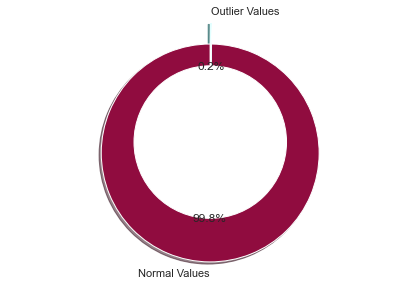

default s outlier number is:  809


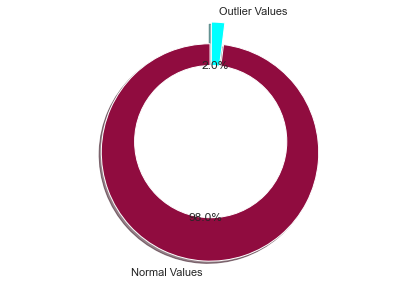

balance s outlier number is:  4280


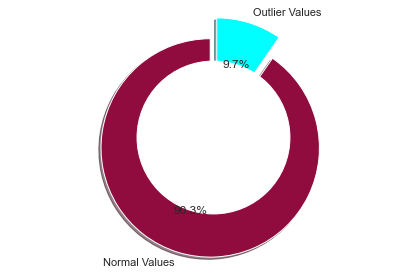

housing s outlier number is:  0


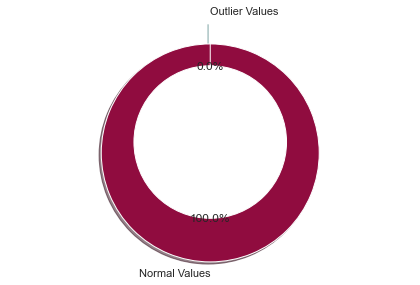

loan s outlier number is:  6930


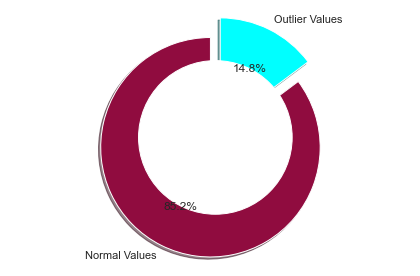

day s outlier number is:  0


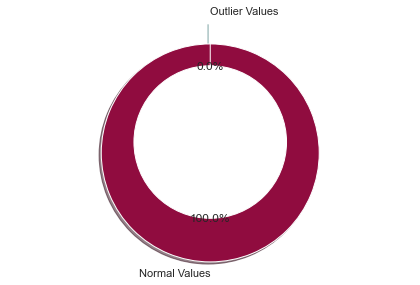

duration s outlier number is:  3000


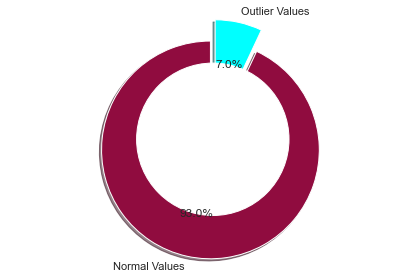

campaign s outlier number is:  2992


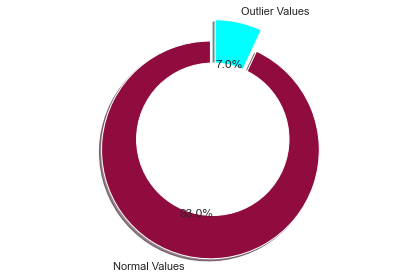

y s outlier number is:  2896


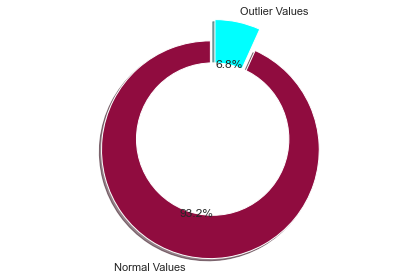

In [ ]:
for column in data_copy.select_dtypes(include=['int64']):
    data_copy[column]=findOutlierForNumerical(data_copy,column,coefficient=1.5)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericalColumns = data.select_dtypes(include=numerics)

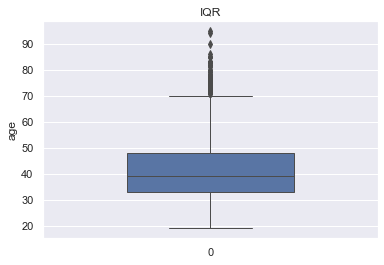

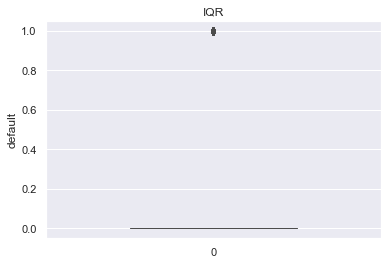

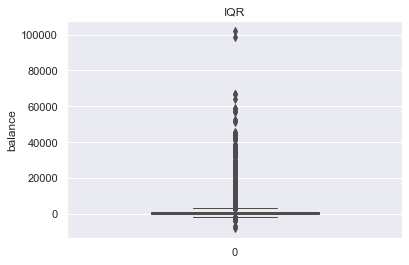

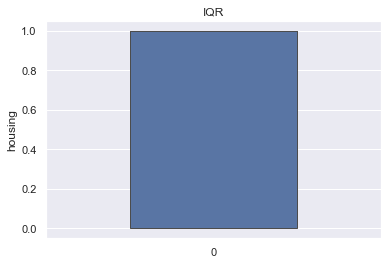

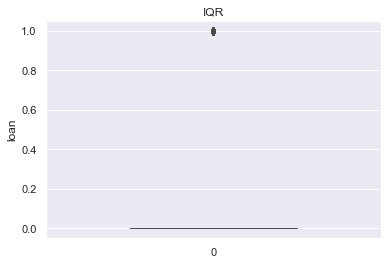

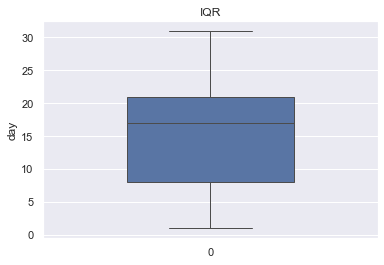

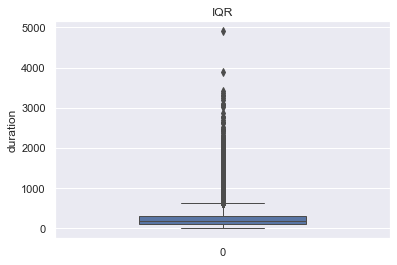

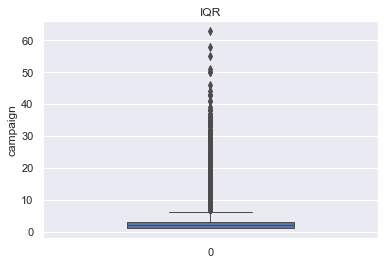

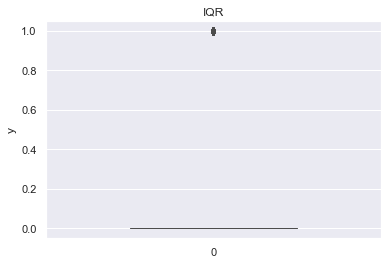

In [ ]:
#Box Plot Each Numeric Features in Train Data

import seaborn as sns
%matplotlib inline
for col in numericalColumns.columns:
    sns.boxplot(data = [numericalColumns[col]], linewidth = 1, width = 0.5) 
    plt.ylabel(col)
    plt.title("IQR")
    plt.show()

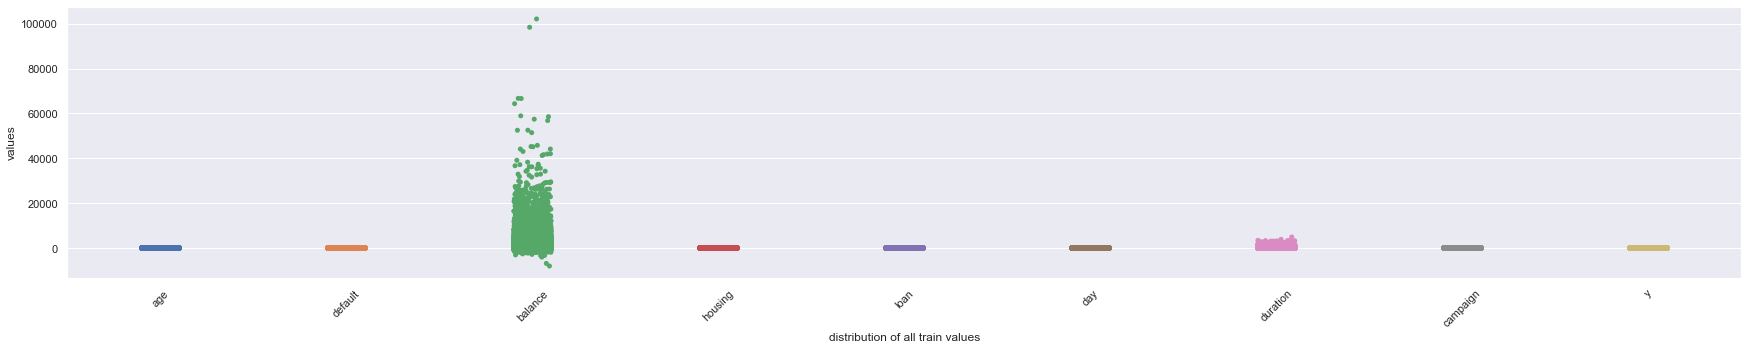

In [ ]:
plt.figure(figsize=(30,5))

plott = pd.DataFrame([(colname, numericalColumns[colname][i]) for i in range(len(numericalColumns)) for colname in numericalColumns.columns], 
                 columns=['distribution of all train values', 'values'])

chart=sns.stripplot(x = 'distribution of all train values', y='values', data=plott)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [ ]:
# sparse columns

sparse_columns=[]
for col in numericalColumns.columns:
    if (numericalColumns[col].quantile(0.01)==numericalColumns[col].quantile(0.25)==numericalColumns[col].mode()[0]):
        sparse_columns.append(col)
print("sparse_columns:",sparse_columns)

sparse_columns: ['default', 'loan', 'campaign', 'y']


In [ ]:
data.skew(axis = 0, skipna = True)
#For normally distributed data's the skewness is approximately 0.
#ıf skewness value > 0 means that there is more weight in the right skew of the distribution. 

age         0.436080
default     6.816736
balance     8.259236
housing    -0.411561
loan        1.726785
day         0.067930
duration    3.165307
campaign    4.730901
y           3.300155
week       -0.249157
dtype: float64

Outlier Data Handling With IQR

In [ ]:
#Numerical Columns in Data
data_num=data.select_dtypes(include=['float64','int64'])

In [ ]:
q1=data_num.quantile(0.05)
q3=data_num.quantile(0.95)

IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outlier_result=(data_num<(lower_bound)) | (data_num>(upper_bound))

outliers=data_num[outlier_result]

clean_data_num=data_num[~((data_num<(lower_bound)) | (data_num>(upper_bound))).any(axis=1)]

In [ ]:
clean_data_num.shape

(38471, 9)

In [ ]:
categorics = ['object' , 'category']
categoricalColumns = data.select_dtypes(include=categorics)
categoricalColumns.shape

(40000, 6)

In [ ]:
final_data=pd.merge(clean_data_num, categoricalColumns, left_index=True, right_index=True)

In [ ]:
final_data

,age,default,balance,housing,loan,day,duration,campaign,y,job,marital,education,contact,month,week
0,58,0,2143,1,0,5,261,1,0,management,Married,tertiary,unknown,may,1_7
1,44,0,29,1,0,5,151,1,0,technician,Single,secondary,unknown,may,1_7
2,33,0,2,1,1,5,76,1,0,entrepreneur,Married,secondary,unknown,may,1_7
3,47,0,1506,1,0,5,92,1,0,blue-collar,Married,secondary,unknown,may,1_7
4,33,0,1,0,0,5,198,1,0,unknown,Single,secondary,unknown,may,1_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,395,0,0,3,107,1,0,technician,Married,tertiary,cellular,jun,1_7
39996,30,0,3340,0,0,3,238,3,1,management,Single,tertiary,cellular,jun,1_7
39997,54,0,200,0,0,3,170,1,1,admin,Single,secondary,cellular,jun,1_7
39998,34,0,1047,0,0,3,342,1,0,management,Married,tertiary,cellular,jun,1_7


One Hot Encoding For Categorical Column

In [ ]:
for cname in final_data.columns:
    if final_data[cname].nunique() > 15 and final_data[cname].dtype == "object":
        print(cname)
        
#There is no categoric feature with more than 15 unique values.
#If there were we would create a new column and flag 1-0 according to the most value count for each column.

In [ ]:
#One Hot Encoding
ohc_final_data = pd.get_dummies(final_data)
ohc_final_data.head()

,age,default,balance,housing,loan,day,duration,campaign,y,job_admin,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,week_15_21,week_1_7,week_22_31,week_8_14
0,58,0,2143,1,0,5,261,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
#Check isnull
col_mask=ohc_final_data.isnull().any(axis=0) 
row_mask=ohc_final_data.isnull().any(axis=1)
ohc_final_data.loc[row_mask,col_mask]

""


In [ ]:
#Dropped duplicate columns
ohc_final_data = ohc_final_data.loc[:,~ohc_final_data.columns.duplicated()]

In [ ]:
#Removing Correlated Features using corr() Method for numeric columns
correlated_features = set()
correlation_matrix = ohc_final_data.loc[:, ohc_final_data.columns != 'y'].corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
correlated_features

{'contact_unknown', 'marital_Single'}

In [ ]:
ohc_final_data.drop(labels=correlated_features, axis=1, inplace=True)

Feature Selection

In [ ]:
y=ohc_final_data['y']
X=ohc_final_data[ohc_final_data.columns.difference(['y'])]

In [ ]:
#With SelectKBest f_regression
from sklearn.feature_selection import SelectKBest, chi2 # for chi-squared feature selection
from sklearn import feature_selection

# categorical feature selection
sf = SelectKBest(score_func=feature_selection.f_regression, k='all')
sf_fit = sf.fit(X, y)
# print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 age: 15.446435
 balance: 81.013309
 campaign: 53.531571
 contact_cellular: 299.782023
 contact_telephone: 0.076634
 day: 0.766203
 default: nan
 duration: 10837.167947
 education_primary: 29.620616
 education_secondary: 23.111761
 education_tertiary: 95.021150
 housing: 121.520901
 job_admin: 3.408039
 job_blue-collar: 43.744971
 job_entrepreneur: 4.228825
 job_housemaid: 10.186521
 job_management: 21.308072
 job_retired: 25.663570
 job_self-employed: 0.753124
 job_services: 8.827953
 job_student: 52.382339
 job_technician: 0.050298
 job_unemployed: 3.826436
 job_unknown: 0.119885
 loan: 37.457835
 marital_Married: 118.779905
 month_apr: 374.480195
 month_aug: 23.239639
 month_dec: 0.004712
 month_feb: 49.655616
 month_jan: 33.231937
 month_jul: 15.560562
 month_jun: 9.877397
 month_mar: 648.698569
 month_may: 57.946671
 month_nov: 7.002637
 month_oct: 344.014283
 week_15_21: 8.283533
 week_1_7: 2.524430
 week_22_31: 4.544600
 week_8_14: 0.271592


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [ ]:
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
datset

,feature,scores
7,duration,10837.167947
33,month_mar,648.698569
26,month_apr,374.480195
36,month_oct,344.014283
3,contact_cellular,299.782023
11,housing,121.520901
25,marital_Married,118.779905
10,education_tertiary,95.021150
1,balance,81.013309
34,month_may,57.946671


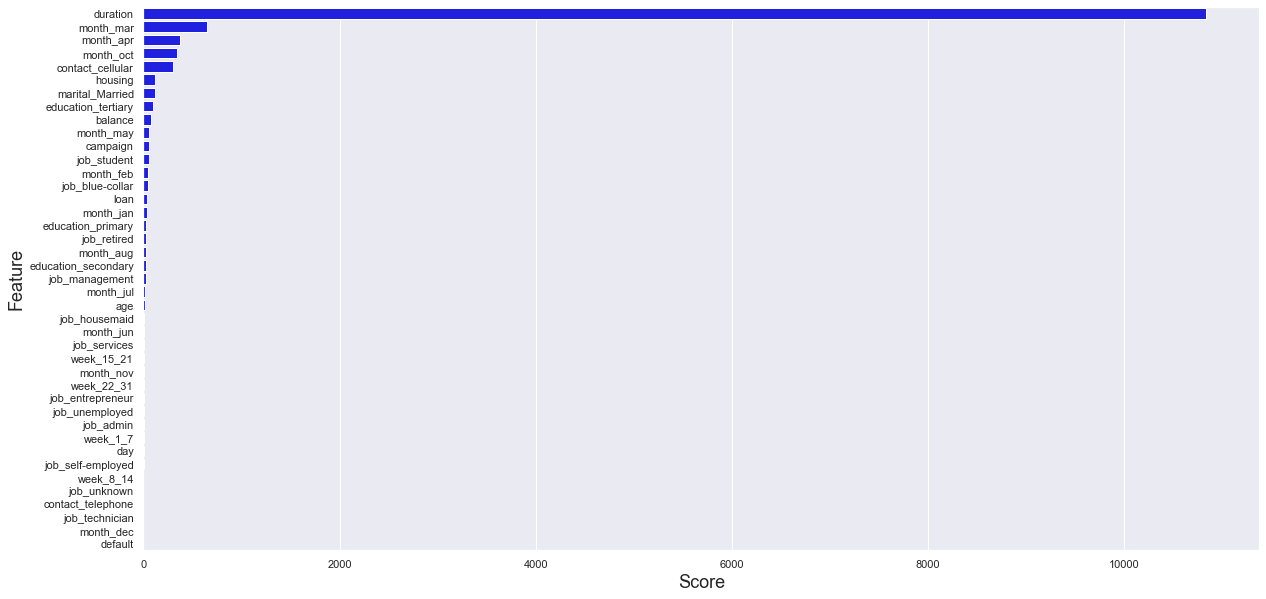

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
#When we used the feature selection method, the most critical feature is duration. Therefore we should focus duration.
#Additional notes: Regarding to data we should increase pay attention our customer March, April and October months.

In [ ]:
result=ohc_final_data[ohc_final_data.columns.difference(['day','job_self-employed','week_[8-14]',
                                                        'job_unknown','contact_telephone','month_dec',
                                                        'default'])]

In [ ]:
#Train Test Split CV

y=result['y']
X=result[result.columns.difference(['y'])]

#Normalization

X=(X-np.min(X))/(np.max(X)-np.min(X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#%% knn model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

#%% K Fold CV

from sklearn.model_selection import cross_val_score
accuries=cross_val_score(estimator=knn, X=X_train, y=y_train, cv=5)

print("average accuracy: " , np.mean(accuries))
print("average std: " , np.std(accuries))

average accuracy:  0.9274944915217335
average std:  0.002018429912566138


In [ ]:
knn.fit(X_train, y_train)
print("test accuracy: ", knn.score(X_test,y_test))

test accuracy:  0.9247244749428155


Other Train Test Split Method for Umbalanced Data

In [ ]:
result['y'].value_counts()

0    35701
1     2770
Name: y, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
result_majority = result[result.y==0]
result_minority = result[result.y==1]

# Upsample minority class
result_minority_upsampled = resample(result_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=35701,    # to match majority class
                                 random_state=123) # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([result_majority, result_minority_upsampled])

# Display new class counts
df_upsampled.y.value_counts()

1    35701
0    35701
Name: y, dtype: int64

In [ ]:
# Separate input features (X) and target variable (y)
y = df_upsampled.y
X = df_upsampled.drop('y', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

K Nearest Neighbor (KNN) Classifer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Model
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test)
print('Tuned knn model accuracy score is: '+ str(accuracy_score(y_test,y_pred)))

Tuned knn model accuracy score is: 0.9238137919444289


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      8921
           1       0.87      1.00      0.93      8930

    accuracy                           0.92     17851
   macro avg       0.93      0.92      0.92     17851
weighted avg       0.93      0.92      0.92     17851



In [ ]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
knn_params={"n_neighbors" : np.arange(1,50)}
knn=KNeighborsClassifier()

knn_cv=GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("The best score is: " +str(knn_cv.best_score_))
print("The best paramaters are: " +str(knn_cv.best_params_))

The best score is: 0.9645198417928287
The best paramaters are: {'n_neighbors': 1}


In [ ]:
knn=KNeighborsClassifier(1)

In [ ]:
knn_tuned=knn.fit(X_train,y_train)

In [ ]:
print('Tuned knn model accuracy score is: ' +str(accuracy_score(y_test,knn_tuned.predict(X_test))))

Tuned knn model accuracy score is: 0.9665004761638003


In [ ]:
# 5 Fold Cv
from sklearn.model_selection import cross_val_score
print('5 Fold Cross Validation Scores: ' +str(cross_val_score(knn_tuned,X_train, y_train)))

5 Fold Cross Validation Scores: [0.9602278  0.96358543 0.96171802 0.95929038 0.96265173]


Visualization of Each Model AUC Curve

In [ ]:
# Creating an empty Dataframe with Scores
df_accur_roc_score = pd.DataFrame(columns=['Roc_Auc_Score'])

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


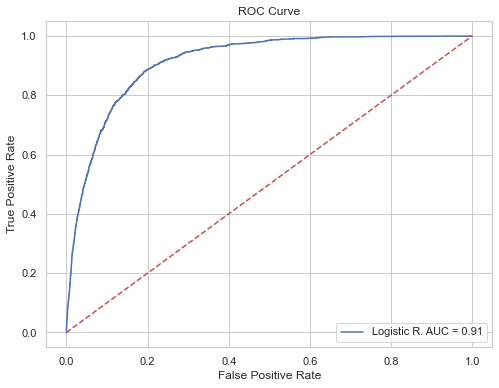

In [ ]:
#Logistic Regression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_preds = clf.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['Logistic_regression'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='Logistic R. AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

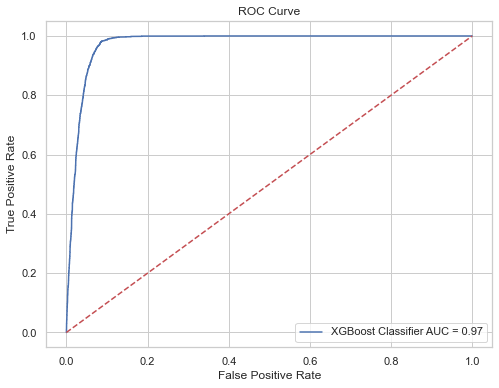

In [ ]:
#XGBOOST Classifier

import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,random_state=0,learning_rate=0.25,eta=0.4,booster="gbtree",
                              base_score=0.8,colsample_bylevel=0.9009229642844634,gamma=0.49967765132613584,
                        max_depth=6,min_child_weight=7,reg_lambda=0.27611902459972926,subsample=0.9300916052594785)

xgb_model.fit(X_train, y_train)

y_preds = xgb_model.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['XGBoost_Classifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='XGBoost Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

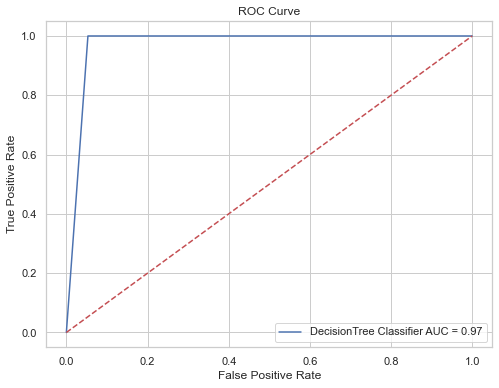

In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

reg_dtr = DecisionTreeClassifier(random_state=0)
reg_dtr.fit(X_train,y_train)

y_preds = reg_dtr.predict_proba(X_test)
preds = y_preds[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, preds)

auc_score = metrics.auc(fpr, tpr)
df_accur_roc_score.loc['DecisionTreeClassifier'] = [auc_score]

plt.subplots(figsize=(8, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='DecisionTree Classifier AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()

In [ ]:
df_accur_roc_score

,Roc_Auc_Score
Logistic_regression,0.913505
XGBoost_Classifier,0.974540
DecisionTreeClassifier,0.973433


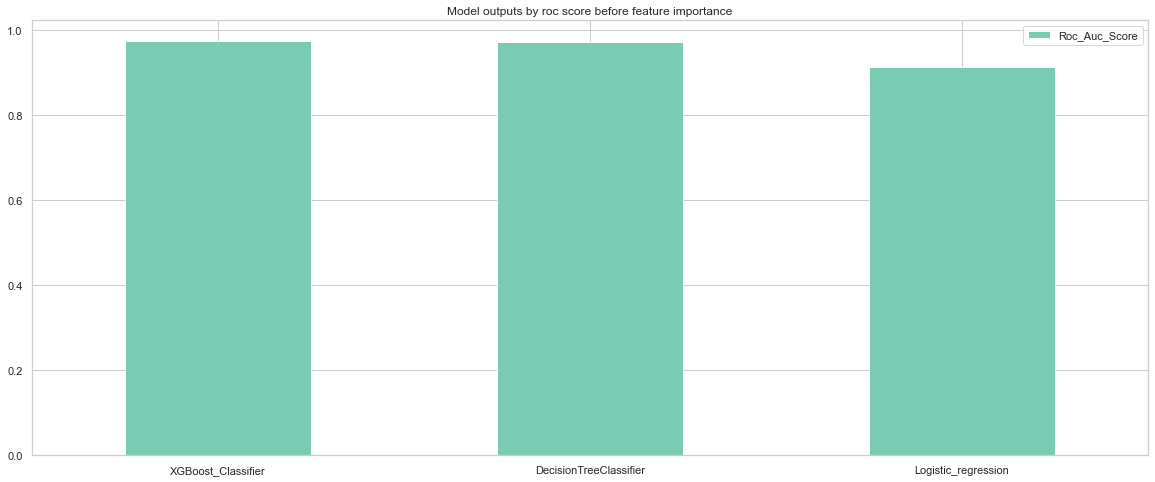

In [ ]:
df_accur_roc_score.sort_values(by=['Roc_Auc_Score'],ascending=False).plot(kind='bar', y='Roc_Auc_Score',figsize=(20,8),color='#79ccb3', 
                                                                          rot=0,title="Model outputs by roc score before feature importance");